# [Lab Session 3](fourier.ipynb)


In [25]:
import numpy as np
import matplotlib.pyplot as plt
#Importiert die Funktion "resize" aus dem Modul "skimage.transform"
from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


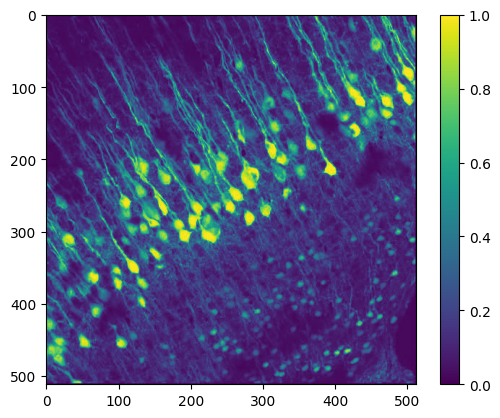

In [26]:
cell_img = plt.imread('data/cells.png')
plt.imshow(cell_img)
plt.colorbar()

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [27]:
cell_ft = np.fft.fft2(cell_img)
print(cell_ft.dtype)
#Checking the real and the imaginary part of the result of the fourier transformation
#Das Bild ist ein 2D Bild, bedeutet wir nutzen "fft2"; und die Arrays der realen und imaginären Teiles sind ebenfalls 2D
print(cell_ft.real)
print("Dimension des realen Teils: ", cell_ft.real.ndim)
print(cell_ft.imag)
print("Dimension des imaginären Teils: ", cell_ft.imag.ndim)

complex128
[[ 5.39638092e+04 -2.57087399e+03  4.96116687e+02 ... -5.51963430e+02
   4.96116687e+02 -2.57087399e+03]
 [-9.82098437e+03  1.22090299e+04  3.21657508e+03 ... -2.32259707e+03
  -1.94554059e+03 -3.54577416e+01]
 [ 1.95744948e+02 -3.26171678e+03  2.44180398e+03 ...  5.86629607e+02
  -9.93906899e+02 -2.76957721e+03]
 ...
 [-1.46150037e+03 -2.55299462e+02  9.35789116e+02 ...  1.57934817e+03
  -2.58105317e+03  1.79445534e+03]
 [ 1.95744948e+02 -2.76957721e+03 -9.93906899e+02 ...  1.01431941e+03
   2.44180398e+03 -3.26171678e+03]
 [-9.82098437e+03 -3.54577416e+01 -1.94554059e+03 ...  2.96266963e+03
   3.21657508e+03  1.22090299e+04]]
Dimension des realen Teils:  2
[[    0.         -1213.64525203  1625.50560013 ... -1940.59933183
  -1625.50560013  1213.64525203]
 [-3218.52919536  5625.74821506   490.33535927 ...   903.18888434
   -644.78697735 -3334.66910794]
 [ -485.64397672 -4239.62141091   187.92111909 ...   -10.03383623
    166.68824586  -426.56231414]
 ...
 [-2183.7304514   -9

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [28]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)

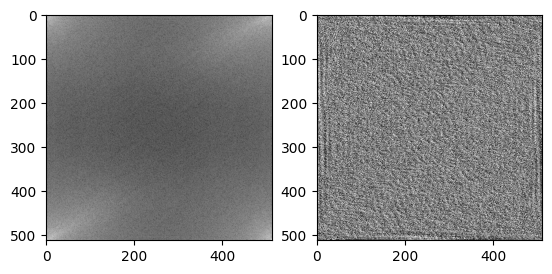

In [29]:
plt.figure()
#bezieht sich auf 1 Spalte, 2 Zeile, 1 Subplot
plt.subplot(1, 2, 1)
#Der Plot zeigt das log. Amplitudenbild in Graustufen
plt.imshow(np.log(amplitude), 'gray')
#bezieht sich auf 1 Spalte, 2 Zeile, 2 Subplot
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


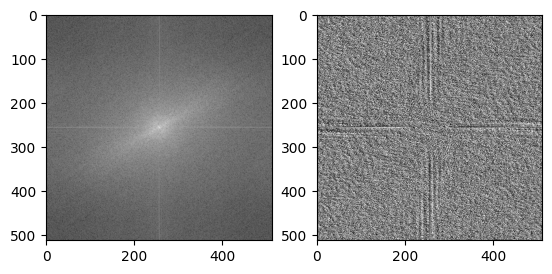

In [30]:
cell_ft0 = np.fft.fftshift(cell_ft)

amplitude0 = np.abs(cell_ft0)
phase0 = np.angle(cell_ft0)

plt.figure()
#bezieht sich auf 1 Spalte, 2 Zeile, 1 Subplot
plt.subplot(1, 2, 1)
#Der Plot zeigt das log. Amplitudenbild in Graustufen
plt.imshow(np.log(amplitude0), 'gray')
#bezieht sich auf 1 Spalte, 2 Zeile, 2 Subplot
plt.subplot(1, 2, 2)
plt.imshow(phase0, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


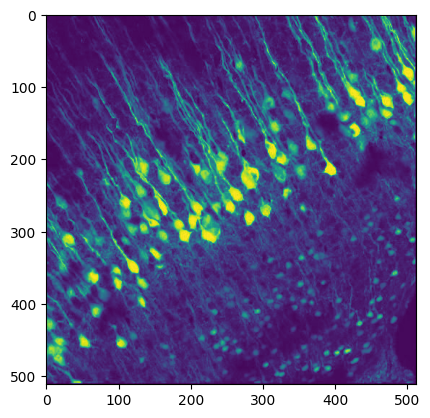

In [ ]:
cell_ft_re = np.fft.ifft2(cell_ft)
#Zeigt nur die realen Werte des invers fourier transformierten Bildes an
plt.imshow(cell_ft_re.real)


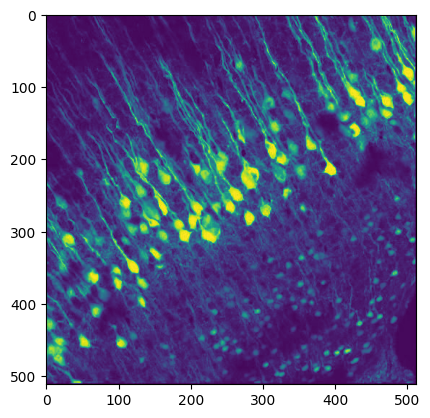

In [36]:
#es ist auch mgl die inverse F. Transformation auf den geshifteten Array anzuwenden
cell_ft0_res = np.fft.ifftshift(cell_ft0)
cell_ft0_re = np.fft.ifft2(cell_ft0_res)
#Zeigt nur die realen Werte des invers fourier transformierten Bildes an
plt.imshow(cell_ft0_re.real)


---


**[Task 2 (a).]()** Load the brain CT image.


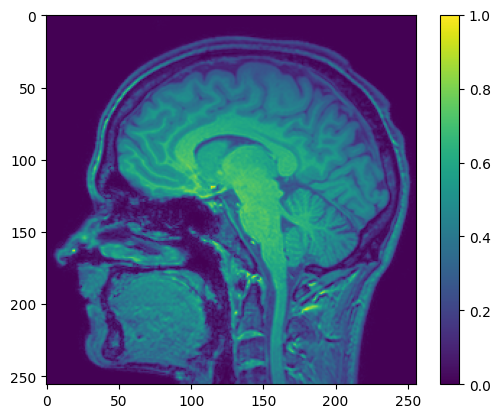

In [ ]:
brain_img = plt.imread('data/brain_ct.png')
plt.imshow(brain_img)
plt.colorbar()

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


In [ ]:
#Fourier-Transformation
brain_ft = np.fft.fft2(brain_img)
#Shift
brain_ft0 = np.fft.fftshift(brain_ft)
#Die Amplitude und Phase des geshifteten Arrays
#kein 0 im Namen weil keine vorhanden die nicht vom Shift ausgehen
amplitude_b = np.abs(brain_ft0)
phase_b = np.angle(brain_ft0)

In [32]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [33]:
filter_window_size = 50

**[Task 3 (b).]()** Create a highpass filter maks.


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


In [34]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

NameError: name 'brain_img' is not defined

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
